# 03 - Generating Predictions - Function for Streamlit Backend

The goal here is to write a function that will accept an MRI brain scan image, perform the necessary preprocessing steps, and feed it into the `Xception` model. The output should the image itself and it's **actual** class, along with the probability of it belonging to each of the 4 classes, and a final comment from the model predicting what class the image is from.

This function will be fed into the backend of the Streamlit application which will allow the user to input an image and get the predicted output immediately without having to look at any code.

In [2]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# os & image imports
import os
from PIL import Image

# tensorflow
import tensorflow as tf

# keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import Precision, Recall, SpecificityAtSensitivity, SensitivityAtSpecificity

# sklearn
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split # need this to split the train set into train/test for model training
from sklearn.metrics import precision_score, recall_score, classification_report

In [ ]:
# notes:

# here I want to create a function
    # takes in an image
    # does the necessary conversions (rescales, resizes, converts to RGB, etc.)
    # fed into --> Xception.predict()
    # take resulting softmax pred probs & label probability of each class
    # print image + actual class
    # print probability for each class
    # print final commenting which class the model predicts (np.argmax())

In [8]:
# load model
xception = tf.keras.models.load_model('./assets/cnn_models/model2.h5')

In [72]:
def model_prediction(file):
    
    original = Image.open(file)
    
    # now, perform operations on the image and convert it into a format the model will accept
    copy = original.resize((256,256)) # resize to 256x256
    copy = copy.convert('RGB') # convert to RGB (3 channels deep)
    copy = np.array(copy) / 255. # turn image into an array of matrices & rescale!
    copy = np.expand_dims(copy, axis = 0) ## this is crucial --> needed to expand the dim from (256, 256, 3) to (1, 256, 256, 3)
    # the (1) denotes the batch size, in this case the size is just 1 since 1 image is being passed
    
    # load the model and use it to predict
    prediction_prob = xception.predict(copy)
    prediction = np.argmax(prediction_prob, axis = 1)[0]
    
    # make sure this is the same set up as the model!
    classes = {0: 'notumor', 1: 'glioma', 2: 'meningioma', 3: 'pituitary'}
    
    # now, let's pull the 'actual' value of the image
    actual = os.path.dirname(file).split('/')[-1] # i've written this so it aligns with how my computer's directories have been structured
    
    # now create a dictionary that will set the class as the key, and that class's predicted probability as the value
    class_probs = {} 
    for i in range(len(prediction_prob[0])):
        class_probs.update({classes[i] : round(prediction_prob[0][i]*100, 2)}) 
    class_probs
    
    
    # return predicted class index, predicted class name, probabilities
    return f'class: {prediction}', f'tumor detected: {classes[prediction]}', f'actual: {actual}', class_probs

In [87]:
image = './data/archive/Testing/meningioma/Te-me_0137.jpg'

In [88]:
model_prediction(image)

1/1 [==============================] - 0s 142ms/step


('class: 2',
 'tumor detected: meningioma',
 'actual: meningioma',
 {'notumor': 0.0, 'glioma': 0.0, 'meningioma': 100.0, 'pituitary': 0.0})

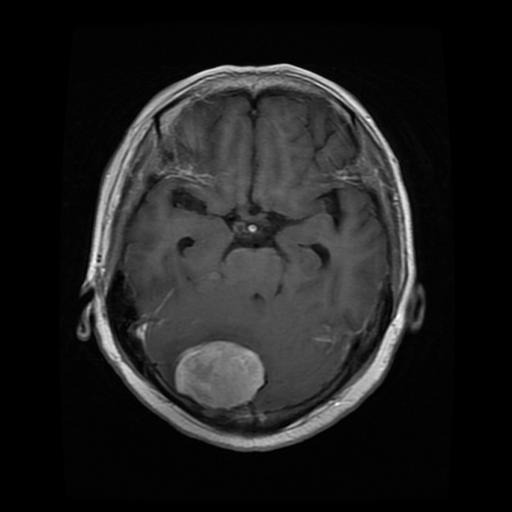

In [89]:
Image.open('./data/archive/Testing/meningioma/Te-me_0137.jpg')